# PROSPER Loan Data

## Preliminary Wrangling

> This notebook explores Udacity curated Prosper loan dataset. The dataset contains loan data, Borrowers credit attributes and  lender data at a loan listing level. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Load dataset into a pandas dataframe
df1 = pd.read_csv("prosperLoanData.csv")

In [3]:
# Making sure there are no duplicates in the dataset
df1.duplicated().sum()

0

In [4]:
# high-level overview of data shape and composition
print(df1.shape)

(113937, 81)


In [5]:
# From datadictionary provided we know prosper score is not available prior to 2009. 
# It should also be noted Prosper changed their business model and credit policy.
# They started using Prosper rating instead of CreditGrade. We will clean data prior to 2009.

df1.dropna(subset = ['ProsperScore'],inplace = True)

In [6]:
# We will limit our focus to below variables instead of 81 that were provided

df1 = df1[['Term','LoanStatus','BorrowerAPR','LenderYield','ProsperScore','ProsperRating (Alpha)','ListingCategory (numeric)','BorrowerState','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','OpenRevolvingMonthlyPayment','DebtToIncomeRatio','IncomeRange','IncomeVerifiable','StatedMonthlyIncome','LoanOriginalAmount','LoanOriginationQuarter']]

In [7]:
# Rename column headers to remove space
df1.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha','ListingCategory (numeric)': 'ListingCategory_numeric'}, inplace=True)

In [8]:
#df1["ListingCategory_numeric"]= df1["ListingCategory_numeric"].astype(str)

In [9]:
# The category of the listing that the borrower selected when posting their listing: 
# 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 
# 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 
# 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans


In [10]:
df1['ListingCategory'] = pd.np.where(df1.ListingCategory_numeric == 1, "Debt Consolidation",
                   pd.np.where(df1.ListingCategory_numeric == 2, "Home Improvement",
                   pd.np.where(df1.ListingCategory_numeric == 3, "Business",
                   pd.np.where(df1.ListingCategory_numeric == 4, "Personal Loan", 
                   pd.np.where(df1.ListingCategory_numeric == 5, "Student Use",
                   pd.np.where(df1.ListingCategory_numeric == 6, "Auto",
                   pd.np.where(df1.ListingCategory_numeric == 7, "Other",
                   pd.np.where(df1.ListingCategory_numeric == 8, "Baby&Adoption", 
                   pd.np.where(df1.ListingCategory_numeric == 9, "Boat",
                   pd.np.where(df1.ListingCategory_numeric == 10, "Cosmetic Procedure",
                   pd.np.where(df1.ListingCategory_numeric == 11, "Engagement Ring",
                   pd.np.where(df1.ListingCategory_numeric == 12, "Green Loans", 
                   pd.np.where(df1.ListingCategory_numeric == 13, "Household Expenses",
                   pd.np.where(df1.ListingCategory_numeric == 14, "Large Purchases",
                   pd.np.where(df1.ListingCategory_numeric == 15, "Medical/Dental",
                   pd.np.where(df1.ListingCategory_numeric == 16, "Motorcycle", 
                   pd.np.where(df1.ListingCategory_numeric == 17, "RV",
                   pd.np.where(df1.ListingCategory_numeric == 18, "Taxes",
                   pd.np.where(df1.ListingCategory_numeric == 19, "Vacation",  
                   pd.np.where(df1.ListingCategory_numeric == 20, "Wedding Loans","Not Available"))))))))))))))))))))

In [82]:
# high-level overview of data shape and composition
print(df1.shape)
print(df1.info())
print(df1.head(10))

(84853, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 1 to 113936
Data columns (total 21 columns):
Term                           84853 non-null int64
LoanStatus                     84853 non-null object
BorrowerAPR                    84853 non-null float64
LenderYield                    84853 non-null float64
ProsperScore                   84853 non-null float64
ProsperRating_Alpha            84853 non-null object
ListingCategory_numeric        84853 non-null int64
BorrowerState                  84853 non-null object
Occupation                     83520 non-null object
EmploymentStatus               84853 non-null object
IsBorrowerHomeowner            84853 non-null bool
CreditScoreRangeLower          84853 non-null float64
CreditScoreRangeUpper          84853 non-null float64
OpenRevolvingMonthlyPayment    84853 non-null float64
DebtToIncomeRatio              77557 non-null float64
IncomeRange                    84853 non-null category
IncomeVerifiable         

### What is the structure of your dataset?

> The total number of records in the dataset is 113937 and it has 81 columns(variables). There is a good mix of categorical and quantitative variables. However there are far too many in the dataset. We will limit our focus to 10 - 15 variables.

### What is/are the main feature(s) of interest in your dataset?

> After going through PROSPER and few other personal loan websites, APR seems to be the most important and interesting feature. 
> As this is a peer to peer lending business, lender yield another interesting feature in the dataset.
> If the APR is too high Borrowers will decline the offer and on the flip side if APR is too low, lenders will lose on their oppurtunity to earn. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Credit score and Custom calculated Prosper Score of the borrower will have the strongest effect on their APR. Other variables such as their Debt to income ratio, Monthly Income, loan amount will help us understand how their APRs get affected. 
> 1) My expectation is that  higher the credit score, Prosper Score and monthly income, lower will be the APR.  
> 2) Higher the debt to income ratio and Loan amount, APR will be higher. 
> 3) On the other hand lender yield will be lower when the Prosper Score and credit score are higher. 
> 4) Also Higher APR will lead to Higher lender yield provided loan repayments are made promptly

## Univariate Exploration

> We will start off our exploration with the most interesting features in the dataset. 
<br> 1) Borrower APR 
<br> 2) Lender Yield
<br>
<br> Next we will look at other variables in the dataset that I think will support APR and Lender Yield.

In [12]:
print(df1[['BorrowerAPR','LenderYield']].describe())

        BorrowerAPR   LenderYield
count  84853.000000  84853.000000
mean       0.226658      0.186017
std        0.079916      0.074631
min        0.045830      0.030000
25%        0.163280      0.125900
50%        0.219450      0.177500
75%        0.292540      0.247400
max        0.423950      0.340000


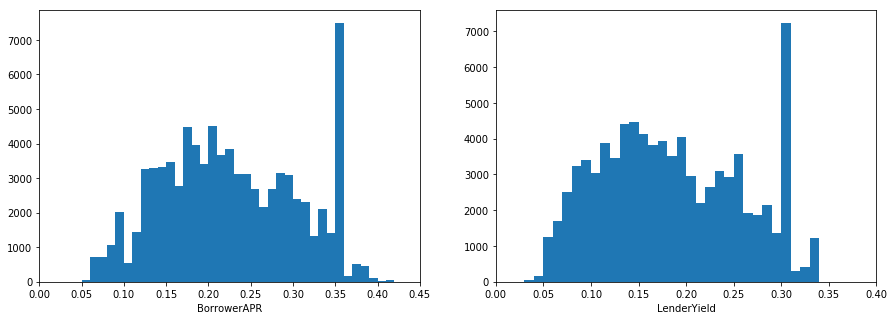

In [13]:
# We can see that the distribution of BorrowerAPR and LenderYield have a relatively similar multimodal distribution with a giant spike at the end
# The spike does not seem to be an outlier. Prosper Rates range from 6.95-35.99% and the spike seems to be the end of the range with high risk borrowers placed there.
# It is highly likely these two will be positively correlated. We will check this during bivariate exploration

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = .01
bins1 = np.arange(0, df1['BorrowerAPR'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins1)
plt.xlim([0,.45])
plt.xlabel('BorrowerAPR');


plt.subplot(1, 2, 2)
binsize2 = .01
bins2 = np.arange(0, df1['LenderYield'].max()+binsize2, binsize2)
plt.hist(data = df1, x = 'LenderYield', bins = bins2)
plt.xlim([0,.4])
plt.xlabel('LenderYield');

In [14]:
df1.groupby('ProsperRating_Alpha')['BorrowerAPR'].mean()

ProsperRating_Alpha
A     0.138909
AA    0.090041
B     0.184030
C     0.226124
D     0.280581
E     0.330551
HR    0.356061
Name: BorrowerAPR, dtype: float64

In [15]:
df1['ProsperRating_Alpha'].value_counts().sort_index()

A     14551
AA     5372
B     15581
C     18345
D     14274
E      9795
HR     6935
Name: ProsperRating_Alpha, dtype: int64

In [16]:
df1.query(' BorrowerAPR >= .35 & BorrowerAPR < .37').ProsperRating_Alpha.value_counts()

HR    5310
E     2309
D       19
C        4
Name: ProsperRating_Alpha, dtype: int64

In [17]:
print(df1[['CreditScoreRangeLower','CreditScoreRangeUpper']].describe())

       CreditScoreRangeLower  CreditScoreRangeUpper
count           84853.000000           84853.000000
mean              699.390240             718.390240
std                47.095937              47.095937
min               600.000000             619.000000
25%               660.000000             679.000000
50%               700.000000             719.000000
75%               720.000000             739.000000
max               880.000000             899.000000


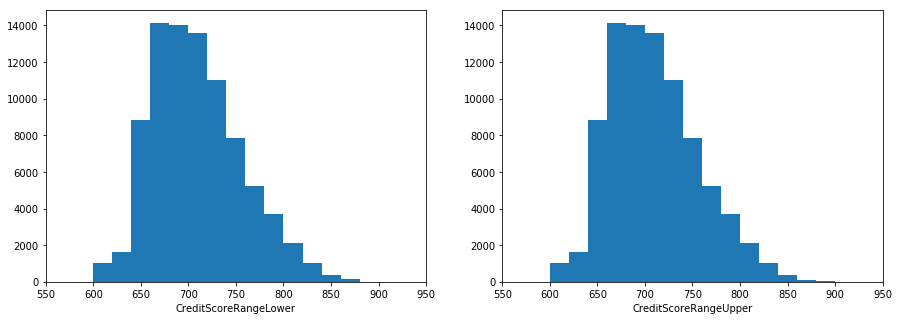

In [18]:
# We can see the data in the distribution start from 600. 
# This is because of Prospers requirement for a borrower to request loan. They need to have a FICO 8 credit score of 
# 1) at least 640 for new borrowers
# 2) and a score of 600 for returning borrowers
# Since peer to peer lending is an unsecured personal loan, Prosper is choosing its borrowers carefully to limit loan defaults.
# The distribution is right skewed because the average credit score tends to be in the upper 690's and lower 700's.
# https://www.experian.com/blogs/ask-experian/what-is-the-average-credit-score-in-the-u-s/

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = 20
bins1 = np.arange(0, df1['CreditScoreRangeLower'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'CreditScoreRangeLower', bins = bins1)
plt.xlim([550,950])
plt.xlabel('CreditScoreRangeLower')

plt.subplot(1, 2, 2) 
binsize2 = 20
bins2 = np.arange(0, df1['CreditScoreRangeUpper'].max()+binsize2, binsize2)
plt.hist(data = df1, x = 'CreditScoreRangeUpper', bins = bins2)
plt.xlim([550,950])
plt.xlabel('CreditScoreRangeUpper');

In [19]:
print(df1[['ProsperScore']].describe())

       ProsperScore
count  84853.000000
mean       5.950067
std        2.376501
min        1.000000
25%        4.000000
50%        6.000000
75%        8.000000
max       11.000000


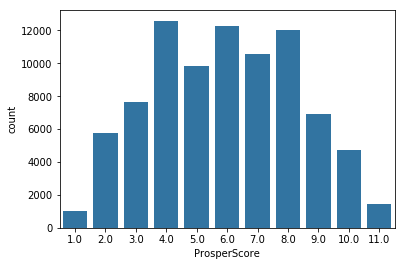

In [85]:
# A custom risk score built using historical Prosper data. 
# The score ranges from 1-10, with 10 being the best, or lowest risk score.  
# Applicable for loans originated after July 2009.
# Unlike credit score which is right skewed, the distribution of ProsperScore looks normally distributed. It suggests overall risk is nicely balanced out.
# I would still expect to see some degree of positive correlation between Prosper Score and Credit score which we will explore in a Bivariate Plot.


base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'ProsperScore', color = base_color);

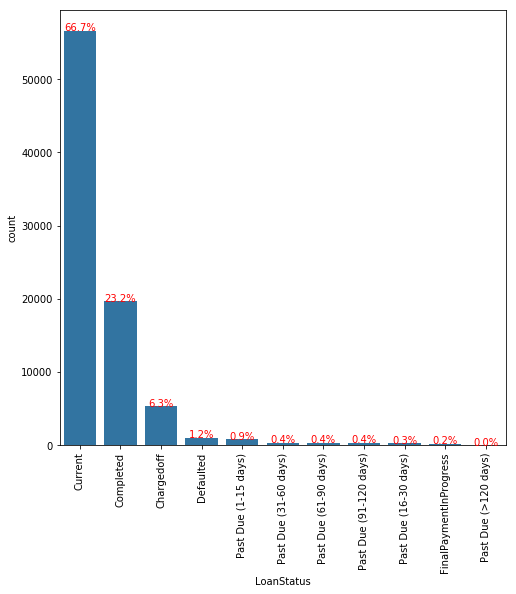

In [21]:
# It must be rejoicing for the lenders to see close to 90% loan status are current or completed.

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 8])
cat_order = df1['LoanStatus'].value_counts().index
sb.countplot(data = df1, x = 'LoanStatus', color = base_color, order = cat_order)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['LoanStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    plt.xticks(rotation = 90);

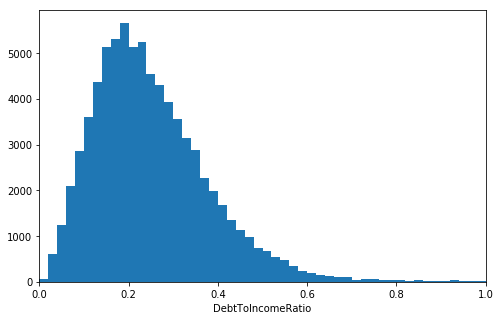

In [22]:
# The distribution is right skewed. It is interesting to see lot borrowers with low DebtToIncomeRatio are procuring loan.
# A look at the reason why the loans are sought will help us understand why these borrowers are seeking loans.

binsize = .02
bins = np.arange(0, df1['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,1])
plt.xlabel('DebtToIncomeRatio')
plt.show()

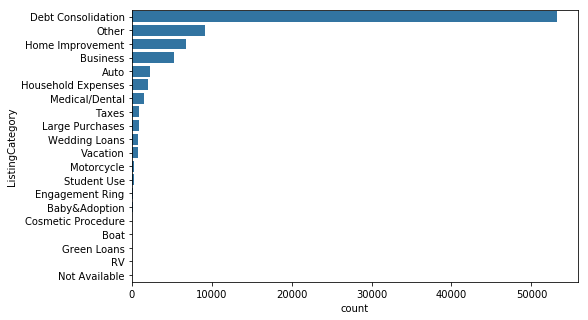

In [36]:
# It appears majority of the loans sought are for the purpose of debt consolidation.
# It makes sense that we are not seeing a larger DebtToIncomeRatio because the majority of loans are taken for debt consolidation.
# Debt consolidation rolls high-interest debts, such as credit card bills, into a single, lower-interest payment.
# Essentially it transfer of debt from one institution to other and reduce high interest payments.
# https://www.nerdwallet.com/blog/finance/consolidate-debt/

base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
cat_order = df1['ListingCategory'].value_counts().index
sb.countplot(data = df1, y = 'ListingCategory', color = base_color , order = cat_order);
#plt.xticks(rotation = 90);

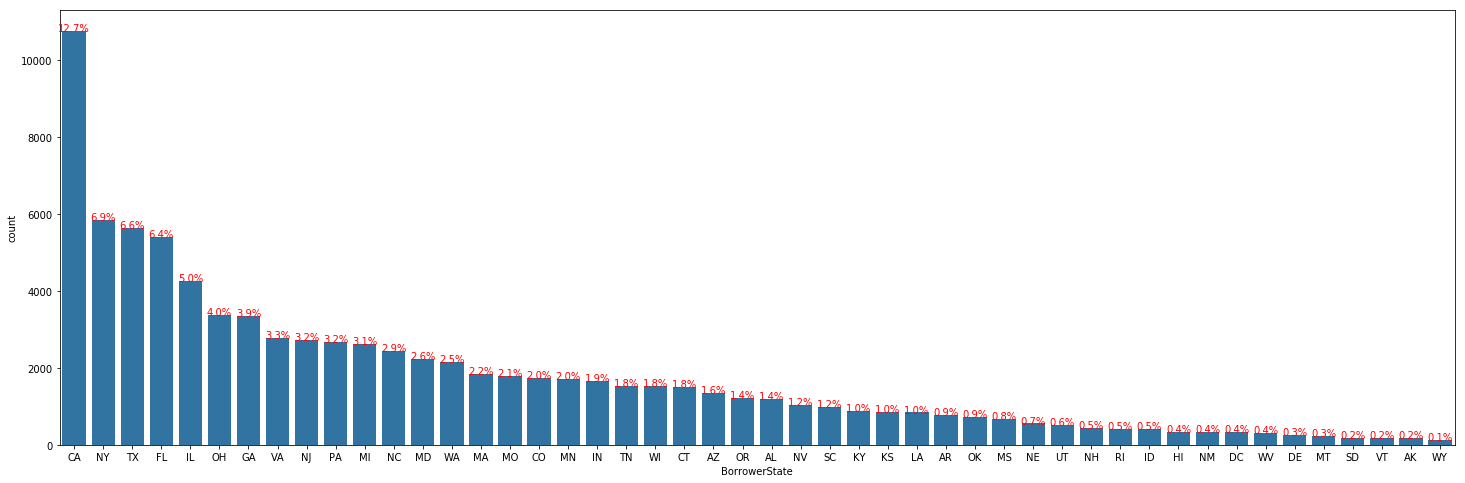

In [24]:
# The distribution of the loans by state closely follows the distribution of states with largest population.

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 8])
cat_order = df1['BorrowerState'].value_counts().index
sb.countplot(data = df1, x = 'BorrowerState', color = base_color, order = cat_order)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['BorrowerState'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')

In [43]:
# IncomeRange is an ordinal categorical variable. PLotting it as-is will not show us any insight readily. 
# Hence we will order it before plot a barchart of it.

var = ['Not employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = var)
df1['IncomeRange'] = df1['IncomeRange'].astype(ordered_var) 

In [ ]:
df1.IncomeRange.value_counts(sort = False)

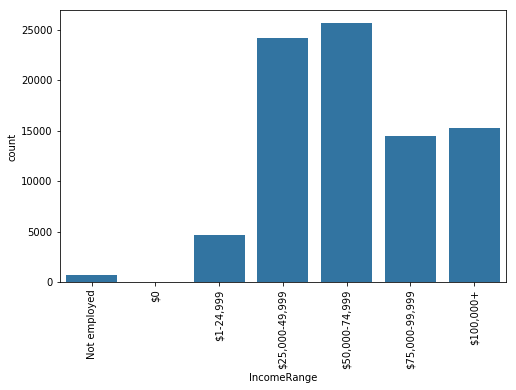

In [45]:
# The ordered barchart shows that majority of borrowers have an income range between $25000 - $74999

base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
sb.countplot(data = df1, x = 'IncomeRange', color = base_color);
plt.xticks(rotation = 90);

In [ ]:
# Calculations to show mean and median of StatedMonthlyIncome variable.

MonthlyIncome25k_75k_mean = df1.query(' StatedMonthlyIncome >= 25000/12 & StatedMonthlyIncome < 74999/12').StatedMonthlyIncome.mean()
MonthlyIncome_mean = df1.StatedMonthlyIncome.mean()
MonthlyIncome_median = df1.StatedMonthlyIncome.media

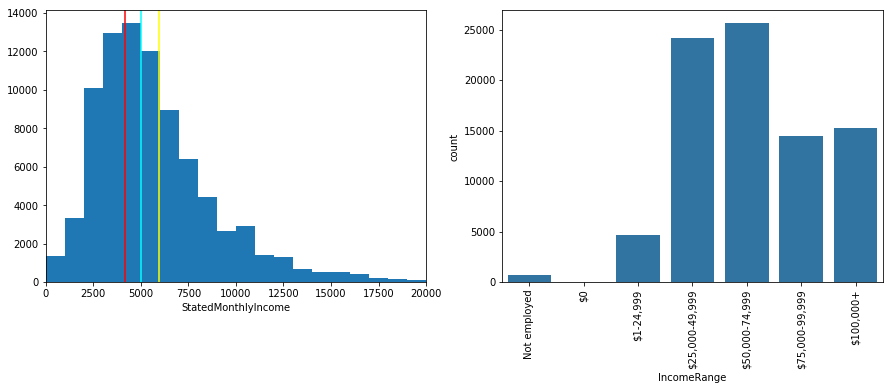

In [77]:
# Lets plot StatedMonthlyIncome and IncomeRange side by side and see if they match.
# StatedMonthlyIncome is right skewed and has a median close to the mean of MonthlyIncome between 25k/12 and 75k/12.
# The distribution closely matches the income range on the right.

plt.figure(figsize=[15, 5])

plt.subplot(1, 2, 1) 
binsize1 = 1000
bins1 = np.arange(0, df1['StatedMonthlyIncome'].max()+binsize1, binsize1)
plt.hist(data = df1, x = 'StatedMonthlyIncome', bins = bins1)
plt.xlim([0,20000])
plt.axvline(MonthlyIncome25k_75k_mean, c='red');
plt.axvline(MonthlyIncome_mean, c='yellow');
plt.axvline(MonthlyIncome_median, c='cyan');
plt.xlabel('StatedMonthlyIncome');

plt.subplot(1, 2, 2)
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'IncomeRange', color = base_color);
plt.xticks(rotation = 90);

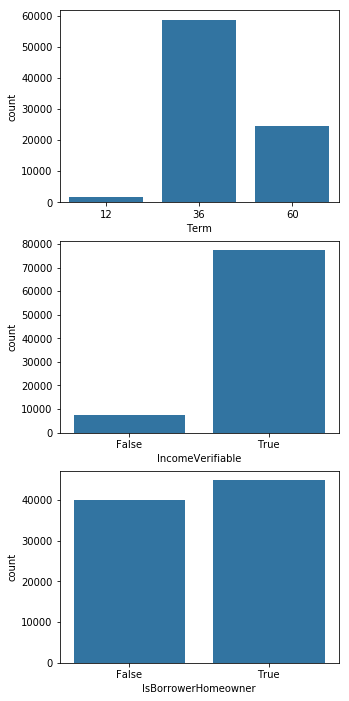

In [51]:
# let's plot some of the other categorical variables to get some insights.
# Most loans are taken for 36 months term.
# 88% borrowers incomes are verifiable
# More than half of the borrowers are home owners.

fig, ax = plt.subplots(nrows=3, figsize = [5,12])

default_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'Term', color = default_color, ax = ax[0])
sb.countplot(data = df1, x = 'IncomeVerifiable', color = default_color, ax = ax[1])
sb.countplot(data = df1, x = 'IsBorrowerHomeowner', color = default_color, ax = ax[2])

plt.show()

In [29]:
# Descriptive statistics for 'LoanOriginalAmount','OpenRevolvingMonthlyPayment' to find bin size for the plots

print(df1[['LoanOriginalAmount','OpenRevolvingMonthlyPayment']].describe())

       LoanOriginalAmount  OpenRevolvingMonthlyPayment
count        84853.000000                 84853.000000
mean          9083.440515                   430.721954
std           6287.860058                   425.874661
min           1000.000000                     0.000000
25%           4000.000000                   156.000000
50%           7500.000000                   311.000000
75%          13500.000000                   564.000000
max          35000.000000                 13765.000000


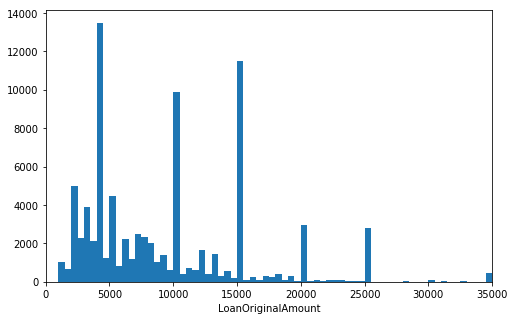

In [83]:
# The histogram alone does not tell clearly how the distribution for loan amount is.
# There are few spikes near 4k, 10k and 15k
# Let us use seaborn to create a distplot

binsize = 500
bins = np.arange(0, df1['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,35000])
plt.xlabel('LoanOriginalAmount')
plt.show()

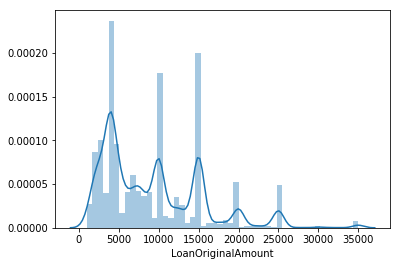

In [60]:
# From plot below LoanOriginalAmount looks multimodal distrubution and is right skewed. 

sb.distplot(df1['LoanOriginalAmount']);

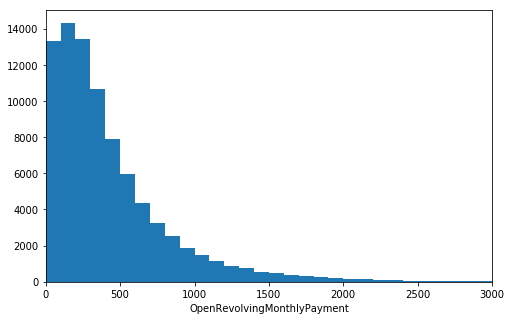

In [86]:
# The distribution is right skewed with median close to $250. There arent lot of monthly payments greater than $2500

binsize = 100
bins = np.arange(0, df1['OpenRevolvingMonthlyPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'OpenRevolvingMonthlyPayment', bins = bins)
plt.xlim([0,3000])
plt.xlabel('OpenRevolvingMonthlyPayment')
plt.show()

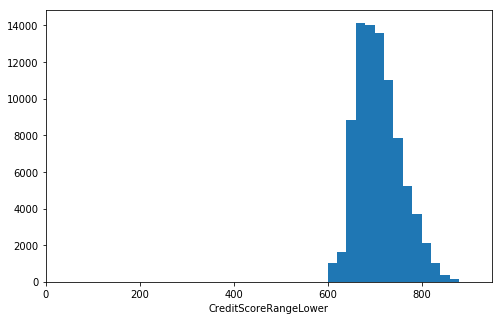

In [32]:
# plotting Credit Score on a standard scale
binsize = 20
bins = np.arange(0, df1['CreditScoreRangeLower'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])

plt.hist(data = df1, x = 'CreditScoreRangeLower', bins = bins)
plt.xlim([0,950])
plt.xlabel('CreditScoreRangeLower')
plt.show()

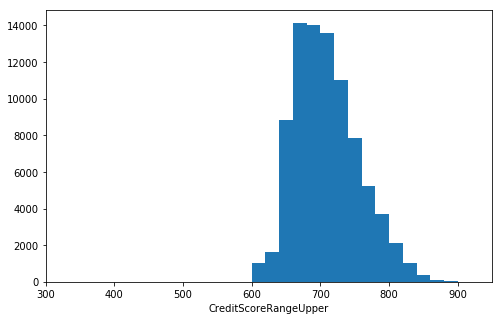

In [33]:
# plotting Credit Score on a standard scale

binsize = 20
bins = np.arange(0, df1['CreditScoreRangeUpper'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'CreditScoreRangeUpper', bins = bins)
plt.xlim([300,950])
plt.xlabel('CreditScoreRangeUpper')
plt.show()

In [34]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
cat_order = df1['ListingCategory'].value_counts().index
sb.countplot(data = df1, x = 'ListingCategory', color = base_color , order = cat_order);
plt.xticks(rotation = 90);

KeyError: 'ListingCategory (numeric)'

<Figure size 576x360 with 0 Axes>

In [ ]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,15])
cat_order = df1['Occupation'].value_counts().index
sb.countplot(data = df1, y = 'Occupation', color = base_color , order = cat_order);

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'ProsperScore', color = base_color);

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'Term', color = base_color);

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'IncomeVerifiable', color = base_color);

In [ ]:
# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[8, 8])
cat_order = df1['LoanStatus'].value_counts().index
sb.countplot(data = df1, x = 'LoanStatus', color = base_color, order = cat_order)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['LoanStatus'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')
    plt.xticks(rotation = 90);

In [ ]:
base_color = sb.color_palette()[0]
sb.countplot(data = df1, x = 'IsBorrowerHomeowner', color = base_color);

In [ ]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
cat_order = df1['EmploymentStatus'].value_counts().index
sb.countplot(data = df1, x = 'EmploymentStatus', color = base_color , order = cat_order);
plt.xticks(rotation = 90);

In [ ]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[8,5])
cat_order = df1['IncomeRange'].value_counts().index
sb.countplot(data = df1, x = 'IncomeRange', color = base_color , order = cat_order);
plt.xticks(rotation = 90);

In [ ]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[12, 8])
cat_order = df1['BorrowerState'].value_counts().index
sb.countplot(data = df1, x = 'BorrowerState', color = base_color , order = cat_order);
plt.xticks(rotation = 90);

In [ ]:
# get proportion taken by most common group for derivation
# of tick marks
n_points = df1.shape[0]
max_count = df1['BorrowerState'].value_counts().max()
max_prop = max_count / n_points

# generate tick mark locations and names
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

cat_order = df1['BorrowerState'].value_counts().index

# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[12, 8])
sb.countplot(data = df1, x = 'BorrowerState', color = base_color , order = cat_order);
plt.xticks(rotation = 90);
plt.yticks(tick_props * n_points, tick_names)
plt.ylabel('proportion');

In [ ]:
# create the plot
base_color = sb.color_palette()[0]
plt.figure(figsize=[25, 8])
cat_order = df1['BorrowerState'].value_counts().index
sb.countplot(data = df1, x = 'BorrowerState', color = base_color, order = cat_order)

# add annotations
n_points = df1.shape[0]
cat_counts = df1['BorrowerState'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels


# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', color = 'r')


In [ ]:
binsize = .01
bins = np.arange(0, df1['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins)
plt.xlim([0,.45])
plt.xlabel('BorrowerAPR')
plt.show()

In [ ]:
print(df1['LoanOriginalAmount'].describe())

In [ ]:
binsize = 500
bins = np.arange(0, df1['LoanOriginalAmount'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LoanOriginalAmount', bins = bins)
plt.xlim([0,35000])
plt.xlabel('LoanOriginalAmount')
plt.show()

In [ ]:
print(df1['OpenRevolvingMonthlyPayment'].describe())

In [ ]:
binsize = 100
bins = np.arange(0, df1['OpenRevolvingMonthlyPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'OpenRevolvingMonthlyPayment', bins = bins)
plt.xlim([0,2000])
plt.xlabel('OpenRevolvingMonthlyPayment')
plt.show()

In [ ]:
binsize = .01
bins = np.arange(0, df1['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LenderYield', bins = bins)
plt.xlim([0,.4])
plt.xlabel('LenderYield')
plt.show()

In [ ]:
binsize = .01
bins = np.arange(0, df1['DebtToIncomeRatio'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim([0,1])
plt.xlabel('DebtToIncomeRatio')
plt.show()

In [ ]:
print(df1['DebtToIncomeRatio'].describe())

In [ ]:
binsize = .005
bins = np.arange(0, df1['BorrowerAPR'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'BorrowerAPR', bins = bins)


# overlay a theoretical normal distribution on top
samp_mean = df1['BorrowerAPR'].mean()
samp_sd = df1['BorrowerAPR'].std()

from scipy.stats import norm
x = np.linspace(0,.4, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df1.shape[0] * binsize # scale the distribution height

plt.plot(x, y)
plt.xlim([0,.4])
plt.xlabel('BorrowerAPR')
plt.show()

In [ ]:
binsize = .005
bins = np.arange(0, df1['LenderYield'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df1, x = 'LenderYield', bins = bins)


# overlay a theoretical normal distribution on top
samp_mean = df1['LenderYield'].mean()
samp_sd = df1['LenderYield'].std()

from scipy.stats import norm
x = np.linspace(0,.4, 200)
y = norm.pdf(x, samp_mean, samp_sd) # normal distribution heights
y *= df1.shape[0] * binsize # scale the distribution height

plt.plot(x, y)
plt.xlim([0,.4])
plt.xlabel('LenderYield')
plt.show()

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!